In [1]:
import pandas as pd
import ast
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt

#loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

#Data cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


c:\Users\revan\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df_US = df[(df['job_country'] == 'United States')].dropna(subset=['salary_year_avg'])

In [3]:
job_titles = df_US['job_title_short'].value_counts().index[:6].tolist()

job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [4]:
df_UD_top6 = df_US[df_US['job_title_short'].isin(job_titles)]

In [12]:
job_order = df_UD_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending=False).index

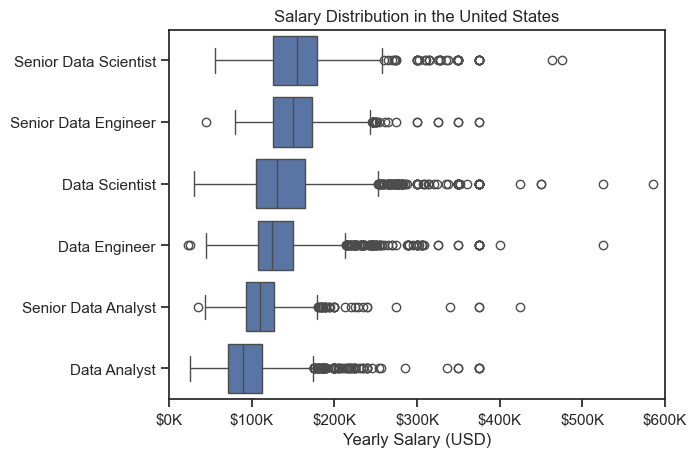

In [13]:
sns.boxplot(data=df_UD_top6, x='salary_year_avg',y ='job_title_short',order =job_order)
sns.set_theme(style='ticks')

plt.title('Salary Distribution in the United States')
plt.xlabel("Yearly Salary (USD)")
plt.ylabel('')
plt.xlim(0,600000)
ticks_x = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().xaxis.set_major_formatter(ticks_x)
plt.show()


In [15]:
df_DA_US= df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

In [16]:
df_DA_US  = df_DA_US.explode('job_skills')

df_DA_US[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [36]:
df_DA_top_pay  = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='median', ascending=False)

df_DA_top_pay = df_DA_top_pay.head(10)

In [44]:
df_DA_skills = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)
df_DA_skills = df_DA_skills.head(10).sort_values(by='median', ascending=False)
df_DA_skills

,count,median
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


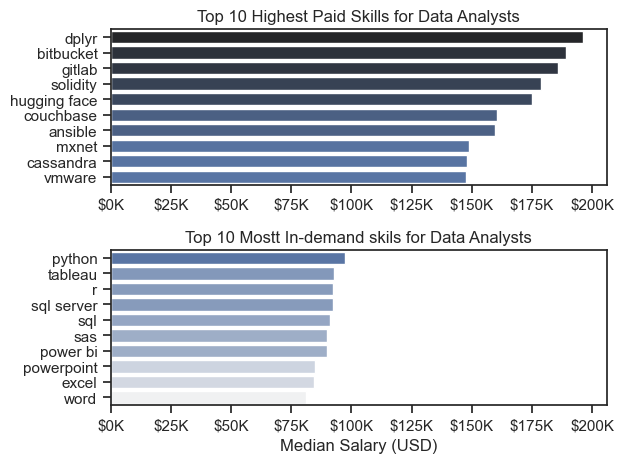

In [46]:
fig,ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

#top 10 hig paid jobs for data analysts
sns.barplot(data=df_DA_top_pay, x='median', y=df_DA_top_pay.index, ax=ax[0], hue='median', palette='dark:b_r' )

# df_DA_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0])
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,pos:f'${int(x/1000)}K'))
# ax[0].invert_xaxis()
ax[0].legend().set_visible(False)

#top 10 in_demand skils for data analyst
sns.barplot(data=df_DA_skills,x = 'median',y = df_DA_skills.index, ax= ax[1], hue='median', palette='light:b')

# df_DA_skills[::-1].plot(kind='barh', y='median', ax=ax[1])
ax[1].set_title('Top 10 Mostt In-demand skils for Data Analysts')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,pos:f'${int(x/1000)}K'))
# ax[0].invert_xaxis()
ax[1].set_xlim(ax[0].get_xlim())

plt.legend().set_visible(False)

fig.tight_layout()
plt.show()